In [25]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

In [26]:
%%html
<!--Bitte diese Cell mit Run ausführen, damit die Styles geladen werden-->
<!--Bei Änderungen des CSS muss das Notebook im Browser neu geladen werden-->
<link rel="stylesheet" href="./styles/sciprolab.css">

# Mandelbrot-Fraktal

Das Mandelbrot-Fraktal wurde zum ersten Mal 1978 gezeichnet und spielt eine große Rolle in der Mathematik, Spieleindustrie und Kunst.

## Rekursion in der Mathematik

Wird ein Element $x_0$ aus der Menge $\{x \in \mathbb{Q} | x \notin [-1, 1]\}$ quadriert, gilt für das Ergebnis $x_1$, dass $x_0 < x_1$. Allgemein gilt dann $x_n < x_{n+1}$ mit dem Bildungsgesetz $x_{n+1} = x_n^2$.

Beispiel für die mehrfache Quadrierung mit $x_0 = -2$:

$$
\begin{aligned}
    &x_0 = -2\\
    &x_1 = x_0^2 = -2^2 = 4\\
    &x_2 = x_1^2 = 4^2 = 16\\
    &x_3 = x_2^2 = 16^2 = 256\\
&...
\end{aligned}
$$

Dieser Prozess kann in Python wie folgt abgebildet werden:

In [20]:
def square(x):
    return x*x

def square_til(start_val, depth):
    if depth <= 0:
        return start_val
    return square_til(square(start_val), depth-1)

print(f"x_2 = {square_til(2,2)}")
print(f"x_3 = {square_til(2,3)}")

x_2 = 16
x_3 = 256


<div class="remark">
    <h3>Maximale Rekursionstiefe</h3>
    Im Code muss eine maximale Rekusionstiefe angegeben werden, da die Berechnung sonst nie terminiert.
</div>

Wie das Beispiel zeigt, wächst $x_n$ mit jeder Quadrierung in die Unendlichkeit, also $\lim \limits_{x_n \to \infty} = \infty$. Die Folge der Zahlen wird **unbeschränkt** genannt. Verwenden wir jedoch einen Startwert $x_0 \in (-1, 1)$, verändert sich das Verhalten bei mehrfacher Quadrierung:

In [21]:
print(f"0.3^2 = {square(0.3)}")
print(f"0.3 fünf Mal rekursiv quadriert = {square_til(0.3, 5)}")
print(f"-0.25 fünf Mal rekursiv quadriert = {square_til(-0.25, 5)}")

0.3^2 = 0.09
0.3 fünf Mal rekursiv quadriert = 1.8530201888518395e-17
-0.25 fünf Mal rekursiv quadriert = 5.421010862427522e-20


Hierbei zeigt sich, dass bei gleichem Bildungsgesetz, aber einem anderen Startwert $\lim \limits_{x_n \to \infty} = 0$ gilt (**beschränkte Folge**).

Für das weitere Verständnis ist wichtig zu wissen, dass rekursive Algorithmen eine Abbruchbedingung (oder Anker) brauchen. Dieser kann einen beliebigen Wert haben. Umso höher dieser Wert ist, desto mehr Werte können berechnet oder angezeigt werden.

<div class="definition">
    <h3>Bildungsgesetz der Mandelbrotmenge</h3>
    Für die Mandelbrotmenge gilt das Bildungsgesetz $z_{n+1}=z_n^2 + c$, wobei $c,z_n \in \mathbb C$. Als Startwert wird $z_0 = 0$ verwendet und es wird rekursiv für mehrere $c$ geprüft, ob $z_n$ mit dem Bildungsgesetz beschränkt bleibt. Ist $|z_n| > 2$, gilt das verwendete $c$ als unbeschränkt und ist nicht Teil der Mandelbrotmenge.
</div>

### Koordinatensystem mit Fluchtkreis in Python

Für die Darstellung des Mandelbrotfraktals wird eine Gaußebene erstellt, die auf der x-Achse (Realteil) und auf der y-Achse (Imaginärteil) auf das Intervall $(-2,5; 2,5)$ begrenzt ist. Diese Beschränkung ist so gewählt, dass das komplette Mandelbrotfraktal abgebildet werden kann.

In [5]:
"""
Erstellt eine Gaußebene (engl. complex plane), für die Darstellung des Mandelbrotfraktals.
"""
x_min, x_max = -2.5, 2.5
y_min, y_max = -2.5, 2.5

def create_complex_plane():
    fig, ax = plt.subplots()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal', adjustable='box')

    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.grid()

    return (fig, ax)

Als _Fluchtkreis_ wird ein Kreis mit dem Radius $2$ und dem Zentrum in $(0,0)$ beschrieben. Dieser Kreis zeigt die Schranke $|z_n| > 2$.

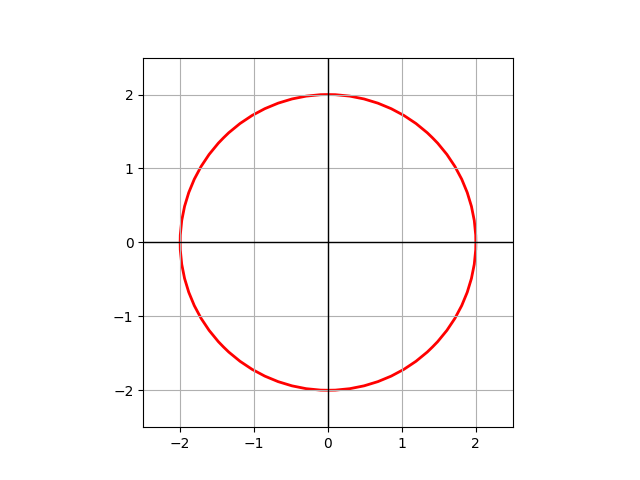

In [6]:
def plot_escape_circle(axes):
    """
    Plottet den Fluchtkreis mit dem Radius 2.
    """
    axes.add_patch(Circle((0, 0), radius=2, edgecolor='red', facecolor='none', linewidth=2))

fig, axes = create_complex_plane()
plot_escape_circle(axes)
plt.show()

### Beispiel

Für ein beliebig gewähltes $c = 1,5 + 0,75i$ gilt:

$$
z_0 = 0\\
z_1 = 0^2 + (1,5 + 0,75i) = 2,8125
$$

Schon ab $z_1$ wird klar, dass $c$ nicht in der Mandelbrotmenge enthalten ist, da $|z_1| = 2,8125$ und $2,8125 > 2$. Das Verfahren zur Ermittlung von $z_n$ funktioniert analog wie bei der mehrfachen Quadrierung oben.

## Mandelbrotfraktal in Python

Auch in Python kann die Berechnung eines $z_n$ rekursiv umgesetzt werden.

In [7]:
def mandelbrotmenge(c, depth, z=0):
    """
    Gibt den Wert von z_n (n entspricht hier der Rekursionstiefe 'depth') für ein gegebenes c zurück.
    """
    if depth <= 0:
        return z
    return mandelbrotmenge(c, depth - 1, z*z + c)

In [8]:
def is_part_of_mandelbrot(c, depth):
    """
    Überprüft, ob das gegebene c Teil der Mandelbrotmenge ist.
    """
    return abs(mandelbrotmenge(c, depth, 0)) <= 2

In [ ]:
print("Gebe die Rekursionstiefe (n) an:")
depth = int(input())
print("Gebe den Realteil einer imaginäre Zahl ein:")
real = float(input())
print("Gebe den Imaginärteil einer imaginäre Zahl ein:")
imag = float(input())

c = complex(real, imag)
a = mandelbrotmenge(c, depth)

print(f"z_{depth} = {a}")
print(f"Betrag von z_{depth} = {abs(a)}")

print(f"Ist {real}+{imag}i Teil der Mandelbrotmenge: {is_part_of_mandelbrot(complex(real, imag), depth)}")

Leider werden hier die Zwischenergebnisse, also $z_1, z_2, ..., z_{n-1}$ der Berechnung ausgelassen. Jedoch können diese als Vektoren in eine Gaußebene eingezeichnet werden. So zeigen die blauen Vektoren jeweils $z_0, ..., z_5$ für $c = 0,3+0.4i$ und die schwarzen Vektoren für $c = 0,5 + 0,6i$. Bei dem schwarzen Vektor zeigt sich, dass sobald ein Vektor den Fluchtkreis verlassen hat, die Werte unbeschränkt wachsen.

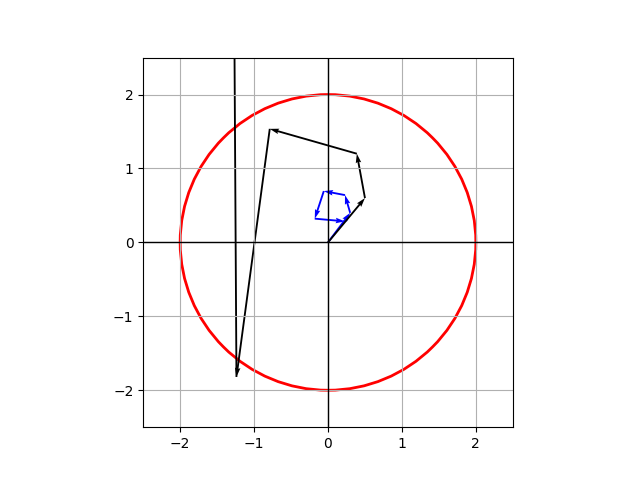

In [9]:
def c_with_vector(ax, c, color, depth=5, z=0):
    """
    Zeichnet die gegebene Anzahl an Interationen der Berechnung der Mandelbrotmenge in
    die Figur ein.
    """
    if depth <= 0:
        return
    dest = mandelbrotmenge(c, 1, z)
    dest_real, dest_imag = dest.real - z.real, dest.imag - z.imag
    ax.quiver(z.real, z.imag, dest_real, dest_imag, scale_units='xy', scale = 1, color=color, width=0.005)
    c_with_vector(ax, c, color, depth - 1, dest)

fig, axes = create_complex_plane()
plot_escape_circle(axes)
c_with_vector(axes, complex(0.3, 0.4), 'blue')
c_with_vector(axes, complex(0.5, 0.6), 'black')
plt.show()

Als Benoît Mandelbrot die Mandelbrotmenge zum ersten Mal auf einem Computer darstellte, hatte dieser nur einen monochronen Monitor. Das heißt, der Monitor konnte nur eine Farbe darstellen. Das Ergebnis war das Mandelbrotfraktal schwarz für alle Elemente $c$, die in der Mandelbrotmenge für ein $n$ enthalten waren, und weiß für die Elemente, die nicht in der Menge waren.

Der folgende Code erstellt ein einfaches Mandelbrotfraktal, das alle komplexe Zahlen, die nicht in der Mandelbrotmenge existieren, blau markiert und alle anderen gelb markiert.

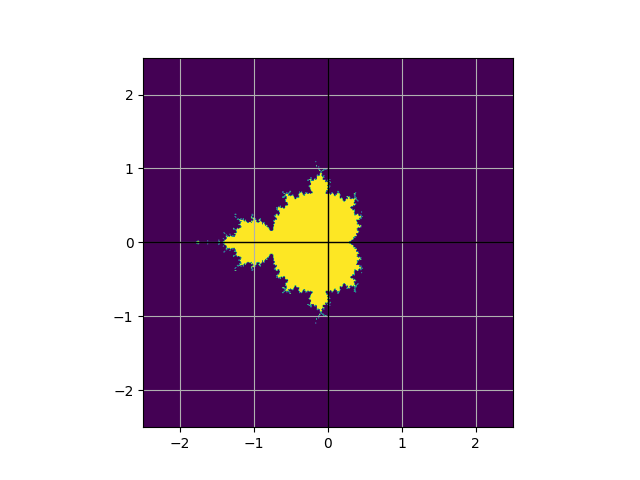

In [10]:
width = height = 500

def mandelbrotmenge_iter(c, depth, z=0, it=0):
    """
    Durchläuft die Berechnung mittels des Bildungsgesetzes rekursiv,
    bis |z_n| > 2 ist oder die maximale Tiefe erreicht ist.
    """
    if abs(z) > 2 or depth <= 0:
        return it
    return mandelbrotmenge_iter(c, depth - 1, z*z + c, it + 1)

def get_mandelbrotfraktal_array(depth, x_max, x_min, y_max, y_min):
    """
    Erstellt ein 2D-Array, das die Mandelbrot-Menge für einen gegebenen Bereich
    im komplexen Zahlenraum darstellt.
    """
    fractal = np.zeros((height, width), dtype=int)
    for x in range(width):
        for y in range(height):
            real = x_min + (x / width) * (x_max - x_min)
            imag = y_min + (y / height) * (y_max - y_min)
            fractal[y][x] = mandelbrotmenge_iter(complex(real, imag), depth)
    return fractal

def plot_simple_mandelbrot(ax, depth, x_max, x_min, y_max, y_min):
    """
    Plottet ein einfaches Mandelbrotfraktal, wobei alle Werte, die in der letzten
    Iteration noch in der Mandelbrotmenge sind, farbig hervorgehoben werden.
    """
    array = get_mandelbrotfraktal_array(depth, x_max, x_min, y_max, y_min)
    return ax.imshow(np.where(array == depth, 1, 0), extent=[x_min, x_max, y_min, y_max])

fig, ax = create_complex_plane()
image = plot_simple_mandelbrot(ax, 20, x_max, x_min, y_max, y_min)
plt.show()

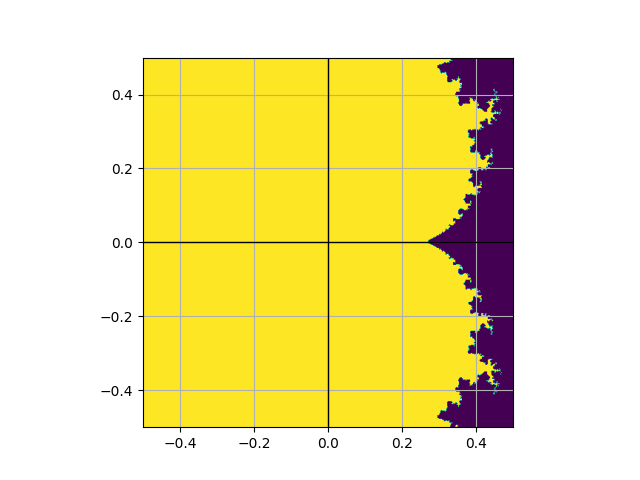

In [14]:
def zoom_into_mandelbrot(ax, depth, x_min, x_max, y_min, y_max):
    """
    Ändert die Achsengrößen und plottet das Fraktal mit den übergebenen Werten neu
    """
    plot_simple_mandelbrot(ax, depth, x_min, x_max, y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.draw()

fig, ax = create_complex_plane()
zoom_into_mandelbrot(ax, 20, -0.5, 0.5, -0.5, 0.5)

Hier wird auf die `c_with_vector()`-Funktion zurückgegriffen, die oben eingeführt wurde. Hier lässt sich leichter ablesen, wie das Mandelbrotfraktal funktioniert. Komplexe Zahlen, dessen Vektoren in einer Iteration den Fluchtkreis verlassen, sind blau, die anderen gelb.

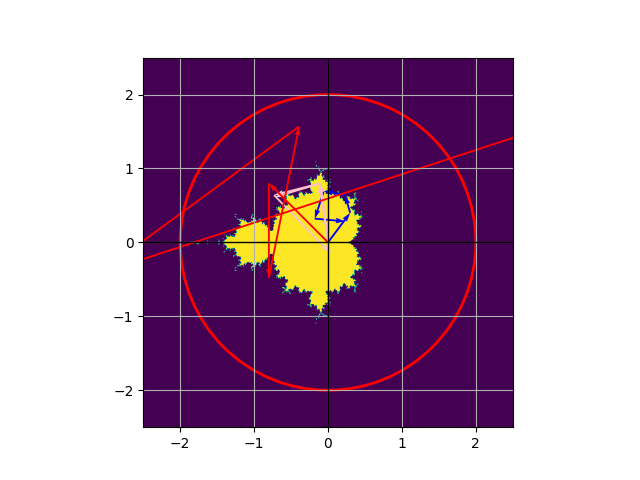

In [11]:
fig, ax = create_complex_plane()
plot_escape_circle(ax)
c_with_vector(ax, complex(0.3, 0.4), 'blue')
c_with_vector(ax, complex(-0.1, 0.8), 'pink')
c_with_vector(ax, complex(-0.8, 0.8), 'red')
plot_simple_mandelbrot(ax, 20, x_max, x_min, y_max, y_min)
plt.show()

In vielen Darstellungen wird das Mandelbrotfraktal in vielen verschiedene Farben gezeigt. Das entsteht durch das markieren von der Anzahl der Iterationen, die es gebraucht hat, bis die jeweilige komplexe Zahl die Mandelbrotmenge verlassen hat.

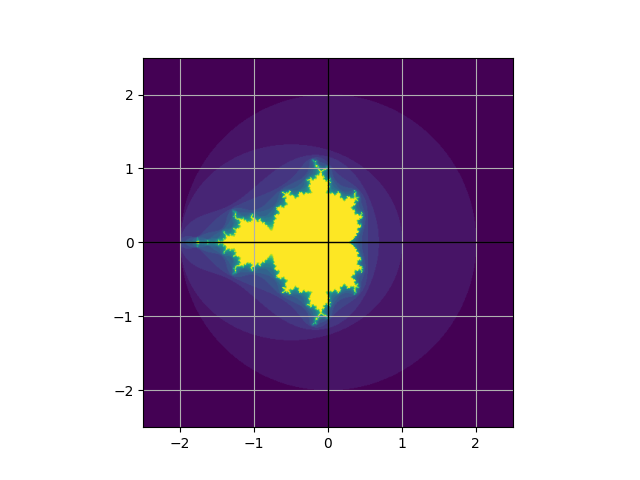

In [12]:
def plot_extended_mandelbrot(ax, depth, x_max, x_min, y_max, y_min):
    array = get_mandelbrotfraktal_array(depth, x_max, x_min, y_max, y_min)
    return ax.imshow(array, extent=[x_min, x_max, y_min, y_max])

fig, ax = create_complex_plane()
image = plot_extended_mandelbrot(ax, 20, x_max, x_min, y_max, y_min)
plt.show()

# Julia-Mengen

Zur Erinnerung: Bei der Berechnung des **Mandelbrotfraktals** wird jeder Punkt in der Ebene durch $c$ dargestellt. Der Algorithmus startet mit $z_0 = 0$ und verändert in jedem Durchlauf das gegebene $z_n$ auf das Ergebnis der vorherigen Iteration. Gilt $|z_n| < 2$, ist $c$ Teil der Mandelbrotmenge.

Die Berechnung der **Julia-Menge** unterscheidet sich nur leicht von der Berechnung des Mandelbrotfraktals. Die Formel zur Berechnung bleibt zwar dieselbe $z_{n+1}=z_n^2 + c$, jedoch wird $z_0$ auf die Koordinate eines Punktes auf der Ebene gesetzt. $c$ bleibt für jede Berechnung gleich, d.h. es wird eine feste komplexe Zahl gewählt, die das Aussehen/Verhalten der gesamten Ebene vorgibt.

Ob eine komplexe Zahl Teil der Julia-Menge ist, wird analog zu der Mandelbrotmenge, mittels $|Z_n| < 2$ festgelegt.

### Beispiel

Für $c = -1.32 - 0.085i$ soll überprüft werden, ob $z_0 = 1,5 - 1,5i$ Teil der Julia-Menge ist:

$$
\begin{aligned}
    z_{n+1} &= z_n^2 + (-1.32 - 0.085i)\\
    z_0 &= (1,5 - 1,5i)^2 + (-1.32 - 0.085i)\\
    z_1 &= (-1.32+4.585i)^2 + (-1.32 - 0.085i)\\
\end{aligned}
$$

Hier ist $|z_0| \approx 4,77$, weswegen $z_0 = 1,5 - 1,5i$ bereits in der ersten Iteration nicht mehr Teil der Julia-Menge ist. Im Folgenden soll diese Überprüfung interaktiv über Python-Code laufen.

In [24]:
print("Realteil c:")
real = float(input())
print("Imaginärteil c:")
imag = float(input())
print("Realteil z_0:")
z_real = float(input())
print("Imaginärteil z_0:")
z_imag = float(input())

print(f"Iterationen: {mandelbrotmenge_iter(complex(real, imag), 20, complex(z_real, z_imag))}")

Realteil c:


 0.1


Imaginärteil c:


 3


Realteil z_0:


 0.2


Imaginärteil z_0:


 0.2


Iterationen: 1


 4


Realteil z_0:


 4


Imaginärteil z_0:


 4


Iterationen: 0


Da sich die Berechnungsformel für Julia-Mengen nicht von der Mandelbrotmenge unterscheidet, kann die Funktion `mandelbrotmenge_iter()` für die Berechnung der Julia-Menge verwendet werden, lediglich der Startwert $z_0$ muss angepasst werden.

Realteil 0.2
Imaginärteil 0.2


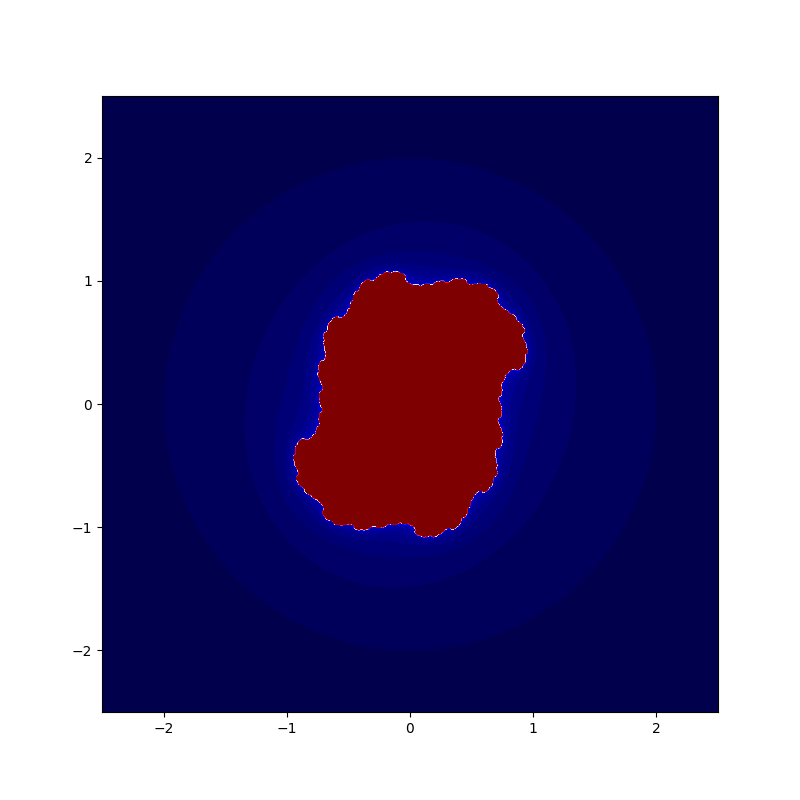

In [22]:
def get_julia_array(c, depth, x_max, x_min, y_max, y_min):
    """
    Erstellt ein 2D-Array, das die Julia-Menge für einen gegebenen Bereich im komplexen Zahlenraum darstellt.
    """
    fractal = np.zeros((height, width), dtype=int)
    for x in range(width):
        for y in range(height):
            real = x_min + (x / width) * (x_max - x_min)
            imag = y_min + (y / height) * (y_max - y_min)
            z = complex(real, imag)

            fractal[y][x] = mandelbrotmenge_iter(c, depth, z)
    return fractal

def plot_julia(ax, c, depth, x_max, x_min, y_max, y_min):
    array = get_julia_array(c, depth, x_max, x_min, y_max, y_min)
    return ax.imshow(array, extent=[x_min, x_max, y_min, y_max], cmap='seismic')

fig, ax = plt.subplots(figsize=(8, 8))
image = plot_julia(ax, complex(float(input("Realteil")), float(input("Imaginärteil"))), 50, x_max, x_min, y_max, y_min)
plt.show()

In [16]:
import unittest

class TestMandelbrot(unittest.TestCase):
    def setUp(self):
        self.depth = 5
        self.big_depth = 50
        self.a = complex(-0.5, 0.5)
        self.b = complex(0, 0)
        self.c = complex(-0.1, 0.65)
        self.d = complex(-0.4, 0.6)
        self.e = complex(1, 1)
        self.f = complex(2, 2)
        self.g = complex(1.5, -1.5)
        self.h = complex(3, 0)

    def test_01_in_mandelbrot(self):
        self.assertTrue(is_part_of_mandelbrot(self.a, self.depth))
        self.assertTrue(is_part_of_mandelbrot(self.a, self.depth))
        self.assertTrue(is_part_of_mandelbrot(self.b, self.depth))
        self.assertTrue(is_part_of_mandelbrot(self.c, self.depth))
        self.assertTrue(is_part_of_mandelbrot(self.d, self.depth))

    def test_02_not_in_mandelbrot(self):
        self.assertFalse(is_part_of_mandelbrot(self.e, self.depth))
        self.assertFalse(is_part_of_mandelbrot(self.f, self.depth))
        self.assertFalse(is_part_of_mandelbrot(self.g, self.depth))
        self.assertFalse(is_part_of_mandelbrot(self.h, self.depth))

    def test_03_not_in_mandelbrot_big_depth(self):
        self.assertFalse(is_part_of_mandelbrot(self.d, self.big_depth))

    def test_04_julia_iter(self):
        self.assertEqual(mandelbrotmenge_iter(complex(0.4, 0.4), 20, complex(0.4, 0.4)), 20)
        self.assertEqual(mandelbrotmenge_iter(complex(0.1, 3), 20, complex(0.2, 0.2)), 1)

if __name__ == '__main__':
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    suite.addTest(TestMandelbrot("test_01_in_mandelbrot"))
    suite.addTest(TestMandelbrot("test_02_not_in_mandelbrot"))
    suite.addTest(TestMandelbrot("test_03_not_in_mandelbrot_big_depth"))
    suite.addTest(TestMandelbrot("test_04_julia_iter"))

    runner = unittest.TextTestRunner()
    runner.run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK


## Zoom-Funktion

Hier wurde auf denselben Quellcode von oben zurückgegriffen. Die hier gezeigten Funktionen unterscheiden sich nicht von den obigen Implementationen.

> Damit der Zoom funktioniert, müssen die Jupyter-Erweiterungen installiert sein.

**Funktionsweise:** die Position des Mauszeigers wird über `event.xdata` und `event.ydata` aufgerufen. Mittels `event.button` wird das aktuelle Event (hoch- oder runterscrollen) aufgerufen. Anschließend werden die neuen Achsenlimits berechnet und mittels dieser Werte Bild neu geplottet. Der Skalierungsfaktor ist hier auf `2.0` festgelegt.

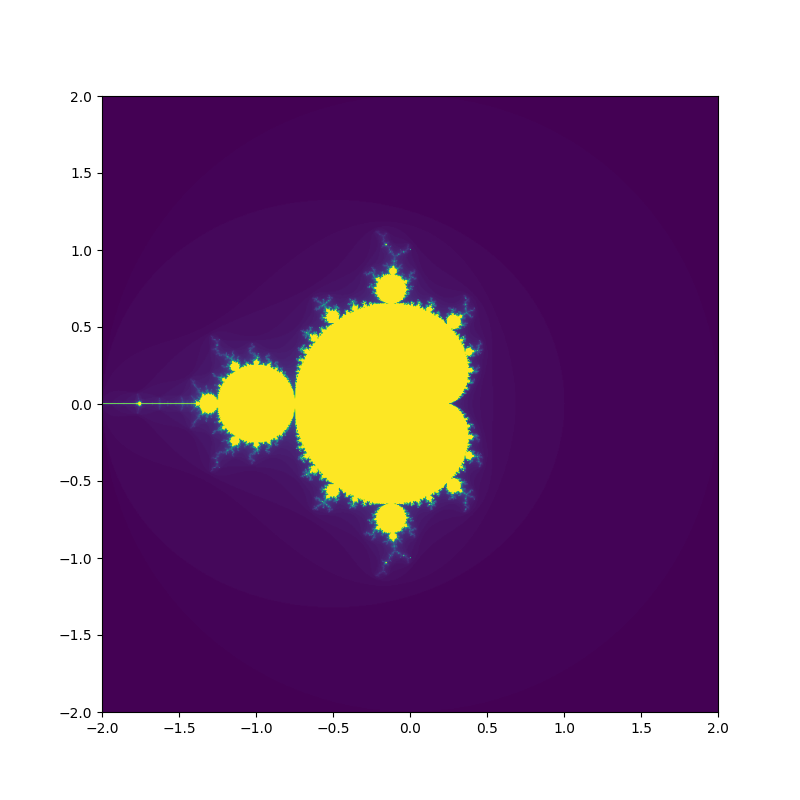

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def get_mandelbrotfraktal_array(depth, x_max, x_min, y_max, y_min, width, height):
    fractal = np.zeros((height, width), dtype=int)
    for x in range(width):
        for y in range(height):
            real = x_min + (x / width) * (x_max - x_min)
            imag = y_min + (y / height) * (y_max - y_min)
            fractal[y][x] = mandelbrotmenge_iter(complex(real, imag), depth)
    return fractal

def plot_extended_mandelbrot(ax, depth, x_min, x_max, y_min, y_max, width, height):
    array = get_mandelbrotfraktal_array(depth, x_max, x_min, y_max, y_min, width, height)
    ax.imshow(array, extent=[x_min, x_max, y_min, y_max], origin='lower')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

def zoom_factory(ax, depth, width, height, base_scale=2.0):
    """
    Leicht veränderte Funktion von: https://gist.github.com/tacaswell/3144287
    """
    def zoom_fun(event):
        # aktuell sichtbaren Achsenlimits
        cur_xlim = ax.get_xlim()
        cur_ylim = ax.get_ylim()

        # Mitte der akuell sichtbaren Achsenlimits
        x_range = (cur_xlim[1] - cur_xlim[0]) / 2
        y_range = (cur_ylim[1] - cur_ylim[0]) / 2

        # Mausposition
        xdata = event.xdata
        ydata = event.ydata

        # Zoom-Richtung
        if event.button == 'up':
            scale_factor = 1 / base_scale
        elif event.button == 'down':
            scale_factor = base_scale
        else:
            return

        # Berechnung der neuen Achsenlimits
        new_x_min = xdata - x_range * scale_factor
        new_x_max = xdata + x_range * scale_factor
        new_y_min = ydata - y_range * scale_factor
        new_y_max = ydata + y_range * scale_factor

        ax.clear()
        plot_extended_mandelbrot(ax, depth, new_x_min, new_x_max, new_y_min, new_y_max, width, height)
        ax.figure.canvas.draw_idle()

    fig = ax.get_figure()
    fig.canvas.mpl_connect('scroll_event', zoom_fun)

width, height = 800, 800
depth = 100
fig, ax = plt.subplots(figsize=(8, 8))
plot_extended_mandelbrot(ax, depth, -2, 2, -2, 2, width, height)
zoom_factory(ax, depth, width, height)
plt.show()

## Genutzte Quellen
* 50 Schlüsselideen Mathematik, Tony Crilly, 978-3-8274-2118-0, Spektrum Akademischer Verlag Heidelberg, S. 100 f.
* Eine Einladung in die Mathematik, Dierk Schleicher, Malte Lackmann, 978-3-642-25797-1, Springer-Verlag Berlin Heidelberg 2013, S. 214 f.
* [What's so special about the Mandelbrot Set? - Numberphile](https://www.youtube.com/watch?v=FFftmWSzgmk&ab_channel=Numberphile) (Transkript beigelegt)
* [Uni Leipzig - Die Mandelbrotmenge](https://www.informatik.uni-leipzig.de/~meiler/Schuelerseiten.dir/DPlotzki/html/mndlbrt.htm)
